In [14]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
# loading the csv file
data = pd.read_csv('Train Dataset .csv')
display(data.head())

print(data.columns)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [3]:
# converting the Train Dataset columns to lower string
data.columns=data.columns.str.lower()
display(data.head())

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


## Inspecting the Train Dataset

In [9]:
# This is to review the Train Dataset 
display(data.info())
print("=======================================================")
display(data.describe())
print("=======================================================")
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


None

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(7303, 15)

In [13]:
# Creating a copy of the Dataset

df_copy = data.copy()
df_copy.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [17]:
# checking for Duplicate and Null values
display(data.isnull().sum())
print("==================================================")
display(data.duplicated().sum())
print("==================================================")
display(data.dtypes)

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

0

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Creating a bar plot that shows the total counts per target value.**

<Axes: xlabel='target', ylabel='count'>

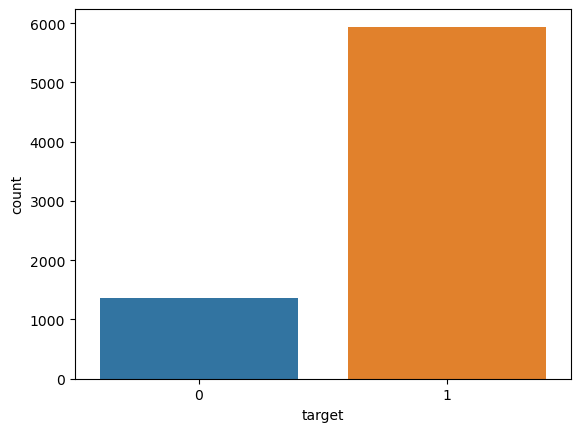

In [15]:
sns.countplot(x='target',data=data)

# Preprocessing

In [6]:
#Splitting and seperating the Datasets into x (Features) and y (Traget)
 # x is the the features
x = data.drop('target' ,axis=1)
 # y is the target variable
y = data['target']

# Splitting Dataset into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [5]:
# Intializing Random Forest classifier
r_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Training the model 
r_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# predicting the model
y_pred = r_forest.predict(x_test)

In [8]:
# Evaluating the model

rand_accuracy = accuracy_score(y_test, y_pred)

print('RESULT')
print(f'Accuracy of Random Forest Classifier: {rand_accuracy:.2f}')

RESULT
Accuracy of Random Forest Classifier: 0.83


# Testing

In [9]:
df = pd.read_csv("Test Dataset.csv")
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [10]:
new2_pred = r_forest.predict(df)

In [12]:
pred_df = pd.DataFrame({'id':df['id'], 'target':new2_pred})
pred_df.to_csv('Heart_Disease_Pred.csv', index=False)